# Harmony analysis

Mitchell / Isthmus

Last 24 hours

## Import libraries

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from matplotlib.ticker import PercentFormatter;

## Import data

In [2]:
df = pd.read_csv('harmony_24_v2.csv', usecols=['from_address','to_address', 'txn_value']);
df.head()

,from_address,to_address,txn_value
0,one1e...hs206,one1w...2xt26,1.228590e+06
1,one18...zp09d,one1w...2xt26,3.071995e+06
2,one1t...2r54m,one10...p6gwz,1.200000e+01
3,one1w...2xt26,one10...qewsp,2.624584e+05
4,one1w...2xt26,one1u...ndaw4,7.223084e+04


## Group by address

I don't think the next cell works 

In [3]:
from_temp = df[['from_address', 'txn_value']]
df_sorted_from = from_temp.groupby(['from_address','txn_value']).sum().sort_values(by='txn_value', ascending=False)

to_temp = df[['to_address', 'txn_value']]
df_sorted_to = to_temp.groupby(['to_address','txn_value']).sum().sort_values(by='txn_value', ascending=False)

## Analyze

### Total txn value

In [4]:
ONE_USD = 0.011
total_value = sum(from_temp['txn_value'])
print('Total transaction volume: ' + str(round(total_value)) + ' ONE')
print('Total transaction volume: ' + str(round(total_value*ONE_USD)) + ' USF')

Total transaction volume: 132667951 ONE
Total transaction volume: 1459347 USF


### Txn value distribution



In [14]:
frac = list()
node_depth = list() 
for r in range(len(df)):
    this_val = df['txn_value'][r] 
    frac.append(this_val/total_value)
    node_depth.append(r/len(df))
    
df['frac_vol'] = frac

In [15]:
df = df.sort_values(by='frac_vol', ascending=False)
df['cum_frac_vol'] = df['frac_vol'].cumsum()
df.head()

,from_address,to_address,txn_value,frac_vol,cum_frac_vol
724,one13...5l7c9,one10...77zxr,0.0000,0.045226,0.045226
38,one1w...2xt26,one19...29aej,2460.0990,0.037726,0.082952
59,one18...wqfss,one18...8ggj7,11.0000,0.037688,0.120640
67,one1x...vn2tk,one15...gjstu,16016.9960,0.031065,0.151705
13,one1w...2xt26,one1n...m8y26,10394.5195,0.027677,0.179382


Text(0, 0.5, '... explain Y fraction of value transfer')

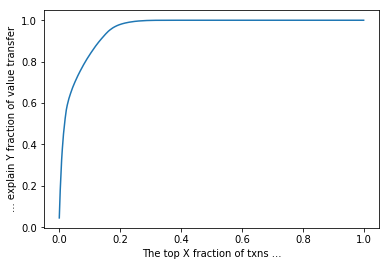

In [24]:
plt.plot(node_depth, df['cum_frac_vol'])
plt.xlabel('The top X fraction of txns ...')
plt.ylabel('... explain Y fraction of value transfer')

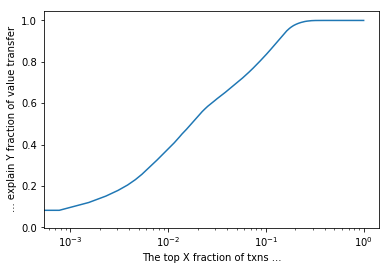

In [26]:
plt.plot(node_depth, df['cum_frac_vol'])
plt.xlabel('The top X fraction of txns ...')
plt.ylabel('... explain Y fraction of value transfer')
plt.xscale('log')
#plt.yscale('log')